# Machine Learning Capstone

#### Bank Marketing Dataset

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. Analysis

### 1.1 Data exploration

#### 1.1.1 Data import

In [2]:
import pandas as pd
import csv
import numpy as np

dataset_df = pd.read_csv("dataset.csv", sep=';', engine='python')

print(dataset_df.columns.values)

pd.set_option('display.max_columns', None)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


Printing first 5 rows of the data.

In [3]:
dataset_df.shape

(41188, 21)

In [4]:
dataset_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
dataset_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### 1.1.2 Descriptive analysis

Getting descriptive statistics about data.

In [6]:
dataset_df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


Visualizing of how many people subscribed to a term deposit (the dependent variable).

In [7]:
import matplotlib.pyplot as plt

y_df = dataset_df['y'].groupby(dataset_df['y']).count()

x_labels = ["%.2f" % (y_df.iloc[0]/dataset_df.shape[0]), "%.2f" % (y_df.iloc[1]/dataset_df.shape[0])]

ax = y_df.plot(kind='bar', figsize=(10,5), title='Credit subscriptions')

for rect, label in zip(ax.patches, x_labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.show()

y_df[0]


<Figure size 1000x500 with 1 Axes>

36548

Visualising distributions of numerical dependent variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110193fd0>,
      dtype=object)

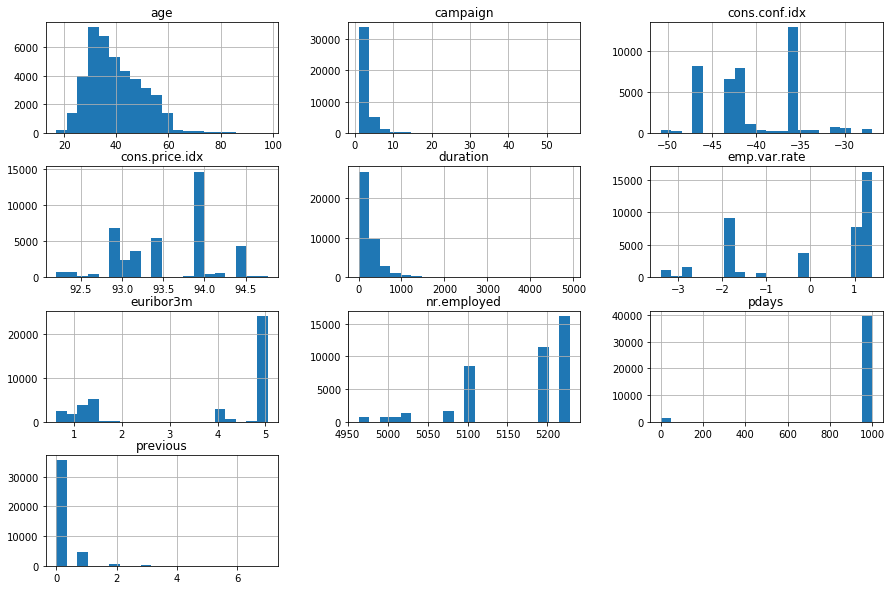

In [8]:
dataset_df.hist(figsize=(15,10), bins=20)

Visualising non numerical features.

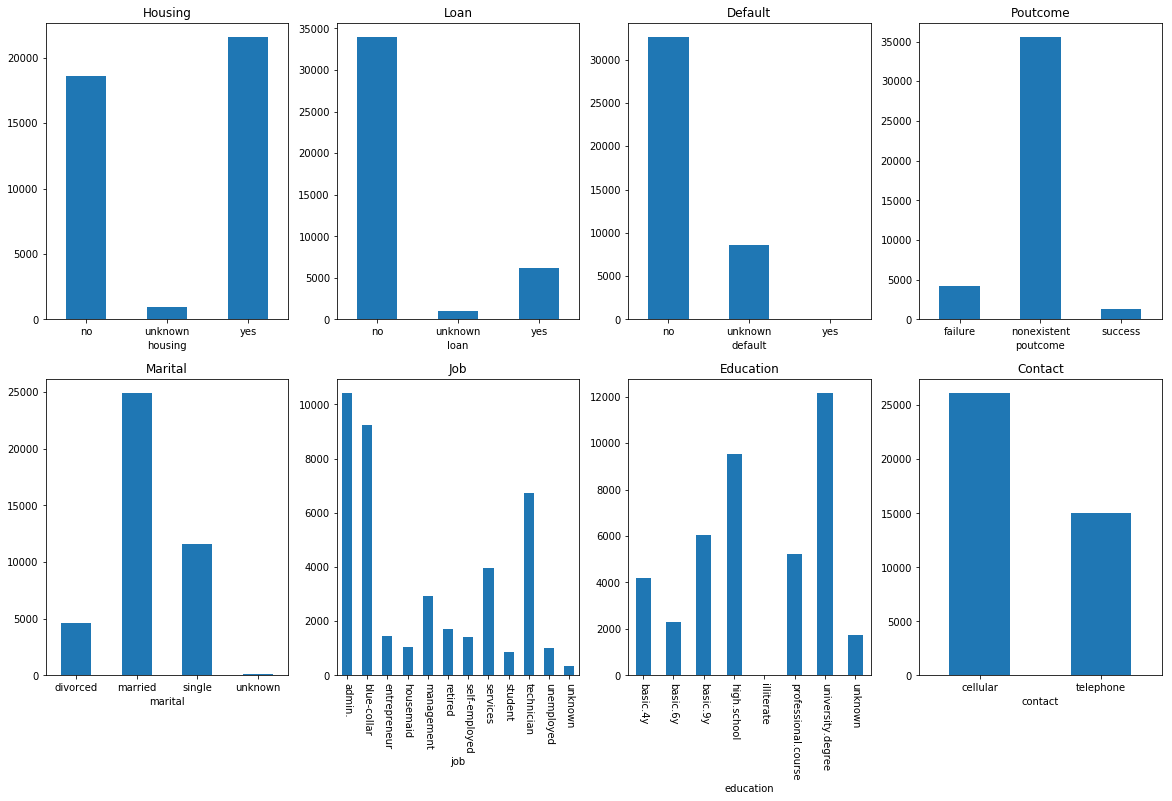

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,12))

housing_df = dataset_df['housing'].groupby(dataset_df['housing']).count()
loan_df = dataset_df['loan'].groupby(dataset_df['loan']).count()
default_df = dataset_df['default'].groupby(dataset_df['default']).count()
poutcome_df = dataset_df['poutcome'].groupby(dataset_df['poutcome']).count()
marital_df = dataset_df['marital'].groupby(dataset_df['marital']).count()
job_df = dataset_df['job'].groupby(dataset_df['job']).count()
education_df = dataset_df['education'].groupby(dataset_df['education']).count()
contact_df = dataset_df['contact'].groupby(dataset_df['contact']).count()

housing_df.plot(ax=axes[0,0], kind='bar', title = 'Housing', rot=0)
loan_df.plot(ax=axes[0,1], kind='bar', title = 'Loan', rot=0)
default_df.plot(ax=axes[0,2], kind='bar', title = 'Default', rot=0)
poutcome_df.plot(ax=axes[0,3], kind='bar', title = 'Poutcome', rot=0)
marital_df.plot(ax=axes[1,0], kind='bar', title = 'Marital', rot=0)
job_df.plot(ax=axes[1,1], kind='bar', title = 'Job', rot=270)
education_df.plot(ax=axes[1,2], kind='bar', title = 'Education', rot=270)
contact_df.plot(ax=axes[1,3], kind='bar', title = 'Contact', rot=0)

plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

### 1.3 Benchmark

As a benchmark model I will assume that all clients subscribed to a product.

In [10]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
#print income
TP = y_df[1]
print(TP)
FP = y_df[0]
print(FP)

# TODO: Calculate accuracy, precision and recall
accuracy = float(TP)/(float(TP)+float(FP))
recall = float(TP)/float(TP)
precision = float(TP)/(float(TP)+float(FP))

# F-score using beta = 2 
fscore = (1 + pow(2, 2)) * precision * recall / ((pow(2, 2) * precision) + recall)
#print fscore

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

4640
36548
Naive Predictor: [Accuracy score: 0.1127, F-score: 0.3883]


## 6 Transforming data

In [11]:
dataset_transformed_df = dataset_df.copy()

### 6.1Transforming skewed distributions to normal distributions.

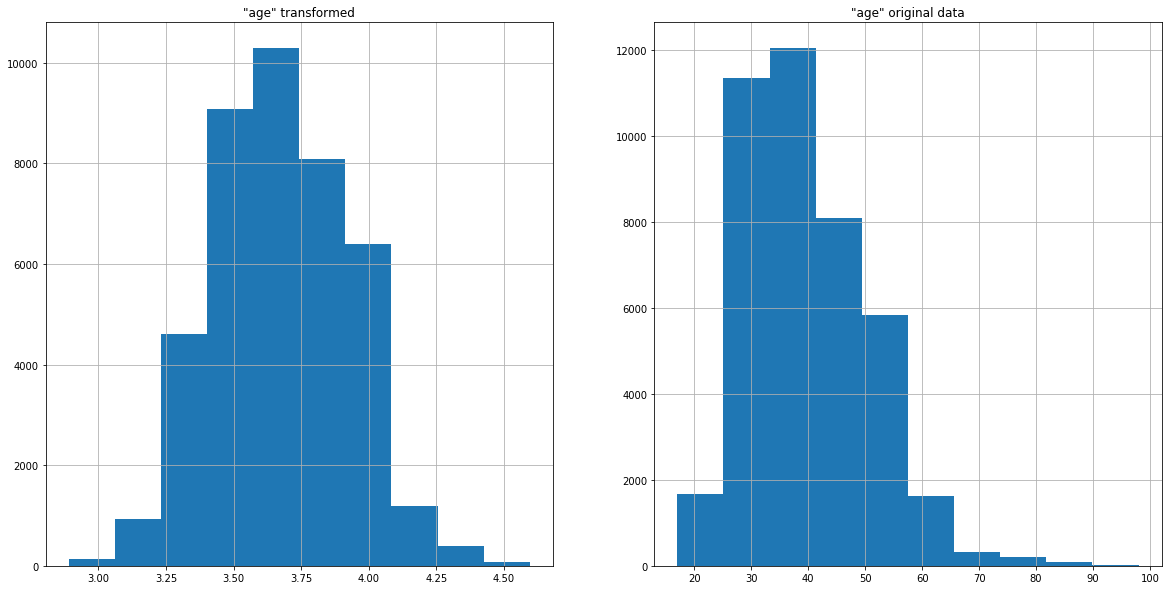

In [12]:
dataset_transformed_df['age'] = np.log1p(dataset_transformed_df['age'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['age'].hist(ax=axes[0])
ax1.title.set_text('"age" transformed')

ax2 = dataset_df['age'].hist(ax=axes[1])
ax2.title.set_text('"age" original data')

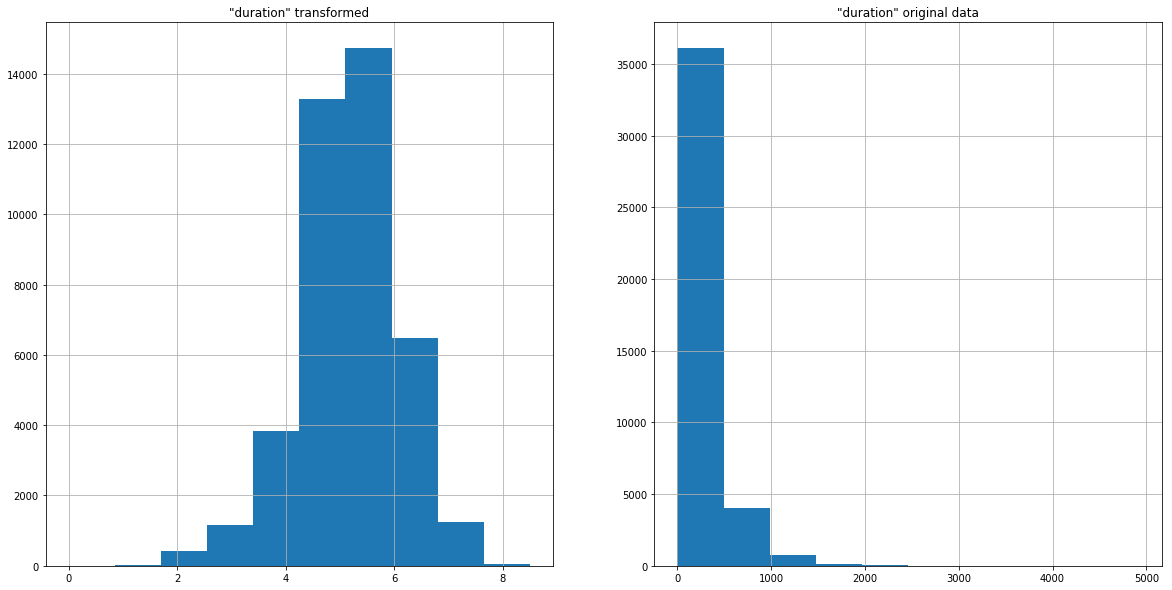

In [13]:
dataset_transformed_df['duration'] = np.log1p(dataset_transformed_df['duration'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['duration'].hist(ax=axes[0])
ax1.title.set_text('"duration" transformed')
ax2 = dataset_df['duration'].hist(ax=axes[1])
ax2.title.set_text('"duration" original data')

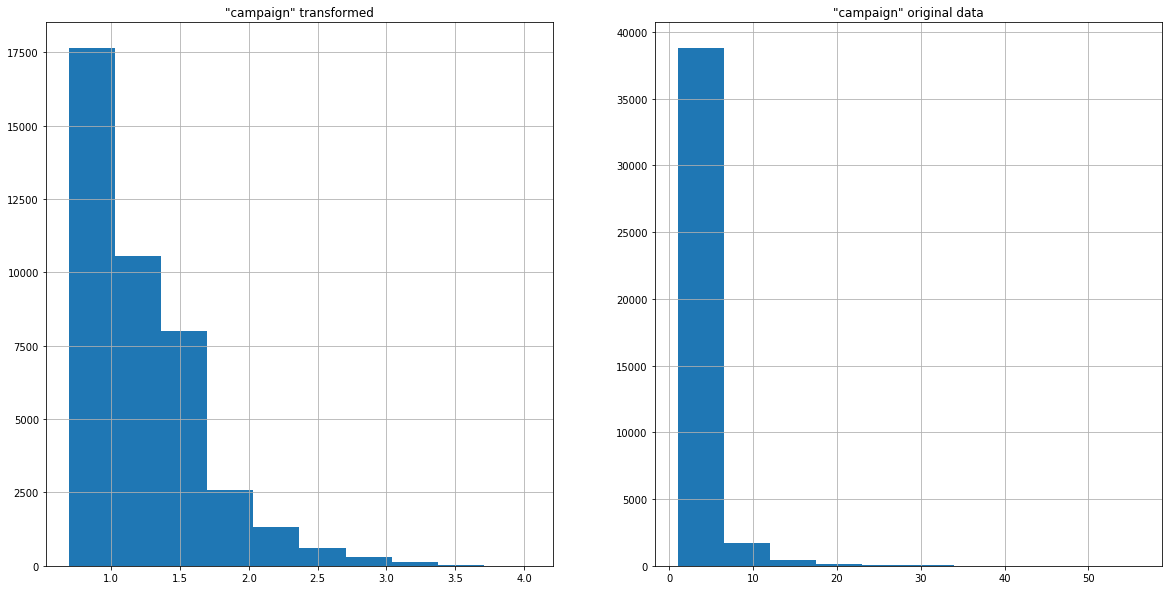

In [14]:
dataset_transformed_df['campaign'] = np.log1p(dataset_transformed_df['campaign'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['campaign'].hist(ax=axes[0])
ax1.title.set_text('"campaign" transformed')
ax2 = dataset_df['campaign'].hist(ax=axes[1])
ax2.title.set_text('"campaign" original data')

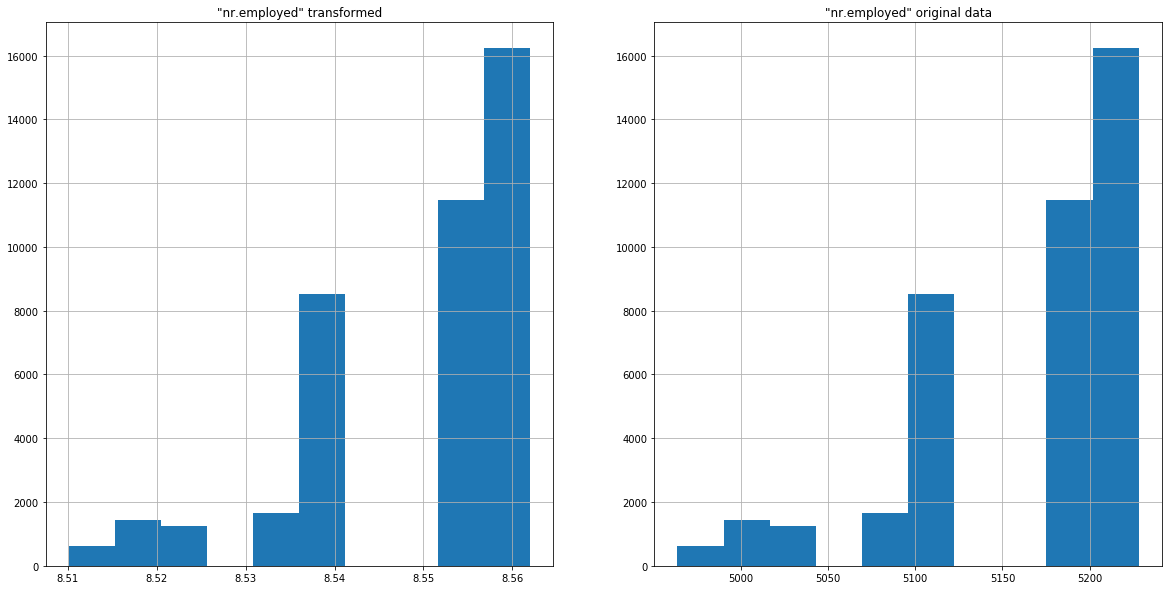

In [15]:
dataset_transformed_df['nr.employed'] = np.log1p(dataset_transformed_df['nr.employed'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax1 = dataset_transformed_df['nr.employed'].hist(ax=axes[0])
ax1.title.set_text('"nr.employed" transformed')
ax2 = dataset_df['nr.employed'].hist(ax=axes[1])
ax2.title.set_text('"nr.employed" original data')

Transforming 'y' column (dependent variable) to numerical, where yes = 1 and no = 0.

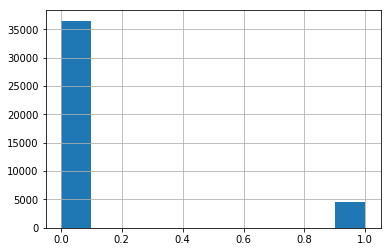

In [16]:
dataset_transformed_df['y'] = dataset_transformed_df['y'].map({'yes': 1, 'no': 0})

dataset_transformed_df['y'].hist()

### 6.2 Missing data

There are no classical missing data in this set. However, there are other yes/no features in this dataset: 'housing', 'loan', 'default', 'poutcome', which besides 'yes' and 'no' have 'unknown', what is actually missing data. Because algorithms I will use do not have missing features handling and there are to many rows with missing features, I will test two types of handling.

First would be assigning numerical values to the variables as following:
- yes / success = 1
- no / failure = -1
- unknown = 0

As I plan to scale features to be in [-1,1], I think it would be the best solution.

Second approach would be to use dummies in order to create new features for every of the variables. It will grow the number of features by 8. It isn't huge number and I am curious if it will have effect on classifier performance.

In [17]:
dataset_transformed_df['housing'] = dataset_transformed_df['housing'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['loan'] = dataset_transformed_df['loan'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['default'] = dataset_transformed_df['default'].map({'yes': 1, 'no': -1, 'unknown': 0})
dataset_transformed_df['poutcome'] = dataset_transformed_df['poutcome'].map({'success': 1, 'failure': -1, 'nonexistent': 0})

In [18]:
dataset_transformed_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4.043051,housemaid,married,basic.4y,-1,-1,-1,telephone,may,mon,5.568345,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
1,4.060443,services,married,high.school,0,-1,-1,telephone,may,mon,5.010635,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
2,3.637586,services,married,high.school,-1,1,-1,telephone,may,mon,5.424950,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
3,3.713572,admin.,married,basic.6y,-1,-1,-1,telephone,may,mon,5.023881,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0
4,4.043051,services,married,high.school,-1,-1,1,telephone,may,mon,5.730100,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0


### 6.3 Inserting dummies

In [19]:
dummies = pd.get_dummies(dataset_transformed_df[['job', 'marital', 'education', 'contact', 'month', 'day_of_week']])

dataset_transformed_df = dataset_transformed_df.join(dummies)

dataset_transformed_df = dataset_transformed_df.drop(['job', 'marital', 'education', 'contact', 'month', 'day_of_week'], axis=1)

dataset_transformed_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,4.043051,-1,-1,-1,5.568345,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,4.060443,0,-1,-1,5.010635,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3.637586,-1,1,-1,5.424950,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,3.713572,-1,-1,-1,5.023881,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4.043051,-1,-1,1,5.730100,0.693147,999,0,0,1.1,93.994,-36.4,4.857,8.554874,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


### 6.4 Feature scaling

Before I start scaling, I save output variable in Y.

In [20]:
Y = dataset_transformed_df['y']

dataset_transformed_df = dataset_transformed_df.drop(['y'], axis=1)

I use min max scaler for feature scaling.

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset_transformed_df)
dataset_transformed_df = scaler.transform(dataset_transformed_df)

dataset_transformed_df

array([[0.67615826, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68636021, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43831368, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67615826, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53749333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.83714208, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

## 7 Model selection

In [22]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

X = dataset_transformed_df.copy()

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 32950 samples.
Testing set has 8238 samples.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=0)
clf_B = RandomForestClassifier(random_state=0)
clf_C = GaussianNB()
clf_D = svm.SVC()
clf_E = DecisionTreeClassifier(random_state=0)

clf_A.fit(X_train, y_train)
y_pred_A = clf_A.predict(X_test)

clf_B.fit(X_train, y_train)
y_pred_B = clf_B.predict(X_test)

clf_C.fit(X_train, y_train)
y_pred_C = clf_C.predict(X_test)

clf_D.fit(X_train, y_train)
y_pred_D = clf_D.predict(X_test)

clf_E.fit(X_train, y_train)
y_pred_E = clf_E.predict(X_test)

print("Fitting done")

Fitting done


In [24]:
from sklearn.metrics import fbeta_score

FBeta_A = fbeta_score(y_test, y_pred_A, beta=2)
FBeta_B = fbeta_score(y_test, y_pred_B, beta=2)
FBeta_C = fbeta_score(y_test, y_pred_C, beta=2)
FBeta_D = fbeta_score(y_test, y_pred_D, beta=2)
FBeta_E = fbeta_score(y_test, y_pred_E, beta=2)

print("Logistic regression: {}".format(FBeta_A))
print("Random forest: {}".format(FBeta_B))
print("Gaussian NB: {}".format(FBeta_C))
print("SVM: {}".format(FBeta_D))
print("Decision tree: {}".format(FBeta_E))

Logistic regression: 0.49348230912476715
Random forest: 0.4792926942764076
Gaussian NB: 0.4784437434279705
SVM: 0.2374968585071626
Decision tree: 0.5217579562675904


In [25]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=3, test_size=.25, random_state=0)

print("Multiple shuffle splits")

for train_index, test_index in rs.split(X):
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    print("TRAIN:", train_index, "TEST:", test_index)

Multiple shuffle splits
Training set has 32950 samples.
Testing set has 8238 samples.
TRAIN: [10685   224 29638 ... 30403 21243  2732] TEST: [15500 29034 11199 ... 24069 15531 31551]
Training set has 32950 samples.
Testing set has 8238 samples.
TRAIN: [37841  8254 16296 ... 30044 38148 19082] TEST: [22105 39759  2482 ... 19020  1099 39473]
Training set has 32950 samples.
Testing set has 8238 samples.
TRAIN: [30981 10376 38704 ... 20228 32122 11218] TEST: [32411  2990 40753 ...  4158 36989 11710]
